In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [21]:
df1 = pd.read_csv("bef_data_1.csv")
df2 = pd.read_csv("bef_data_2.csv")
df3 = pd.read_csv("bef_data_3.csv")
df4 = pd.read_csv("bef_data_4.csv")
df5 = pd.read_csv("bef_data_5.csv")

#df1 = df1.set_index('time')
#df1.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
#df1

In [22]:
def shaper(arr, n_time = 1):
    arr = arr.values.tolist()
    shape_list = []
    for i in range(0, len(arr) - n_time, 1):
        time_list = []
        for j in range(n_time):
            time_list +=arr[i + j]
        shape_list.append(time_list)
        
    columns = []
    for i in range((-n_time)+1,1,1):
        columns += ["Temp1_" + str(i), 
                    "Temp2_" + str(i), 
                    "Temp3_" + str(i), 
                    "Temp4_" + str(i), 
                    "Temp5_" + str(i), 
                    "Temp6_" + str(i), 
                    "Temp7_" + str(i), 
                    "Temp8_" + str(i), 
                    "Temp9_" + str(i), 
                    "Temp10_" + str(i),
                    #'cond1_off_' + str(i),
                    #'c1_16h_' + str(i), 
                    #'c1_16l_' + str(i), 
                    #'c1_23h_' + str(i), 
                    #'c1_23l_' + str(i), 
                    #'c1_30h_' + str(i), 
                    #'c1_30l_' + str(i), 
                    #'cond2_off_' + str(i), 
                    #'c2_16h_' + str(i), 
                    #'c2_16l_' + str(i), 
                    #'c2_23h_' + str(i), 
                    #'c2_23l_' + str(i), 
                    #'c2_30h_' + str(i), 
                    #'c2_30l_' + str(i)
                   ]
    
    td = pd.DataFrame(shape_list, columns = columns)
    return td

def union_shaper(df_list, n_time = 1):
    frames = []
    for i in range(len(df_list)):
        df = pd.DataFrame(df_list[i], columns = ["time", "Temp1","Temp2", "Temp3", "Temp4", "Temp5", "Temp6", "Temp7", "Temp8", "Temp9", "Temp10"])
        df = df.set_index('time')
        df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
        df = shaper(df, n_time)
        
        df['Temp1+1'] = df['Temp1_0'].shift(-1)
        df['Temp2+1'] = df['Temp2_0'].shift(-1)
        df['Temp3+1'] = df['Temp3_0'].shift(-1)
        df['Temp4+1'] = df['Temp4_0'].shift(-1)
        df['Temp5+1'] = df['Temp5_0'].shift(-1)
        df['Temp6+1'] = df['Temp6_0'].shift(-1)
        df['Temp7+1'] = df['Temp7_0'].shift(-1)
        df['Temp8+1'] = df['Temp8_0'].shift(-1)
        df['Temp9+1'] = df['Temp9_0'].shift(-1)
        df['Temp10+1'] = df['Temp10_0'].shift(-1)

        df['Temp1+1'].fillna(24, inplace=True)
        df['Temp2+1'].fillna(24, inplace=True)
        df['Temp3+1'].fillna(24, inplace=True)
        df['Temp4+1'].fillna(24, inplace=True)
        df['Temp5+1'].fillna(24, inplace=True)
        df['Temp6+1'].fillna(24, inplace=True)
        df['Temp7+1'].fillna(24, inplace=True)
        df['Temp8+1'].fillna(24, inplace=True)
        df['Temp9+1'].fillna(24, inplace=True)
        df['Temp10+1'].fillna(24, inplace=True)
        frames.append(df)
    return pd.concat(frames, ignore_index=True)

In [23]:
N_TIME = 6
df = union_shaper([df1, df2, df3, df4, df5], N_TIME)
df

,Temp1_-5,Temp2_-5,Temp3_-5,Temp4_-5,Temp5_-5,Temp6_-5,Temp7_-5,Temp8_-5,Temp9_-5,Temp10_-5,...,Temp1+1,Temp2+1,Temp3+1,Temp4+1,Temp5+1,Temp6+1,Temp7+1,Temp8+1,Temp9+1,Temp10+1
0,28,27,27,27,28,27,27,28,27,27,...,27.0,26.0,26.0,26.0,27.0,26.0,26.0,27.0,27.0,27.0
1,27,27,27,27,28,27,27,28,27,27,...,26.0,26.0,26.0,26.0,27.0,26.0,26.0,27.0,26.0,27.0
2,27,27,27,27,27,26,26,27,27,27,...,26.0,26.0,26.0,26.0,27.0,26.0,26.0,27.0,26.0,27.0
3,27,26,26,27,27,26,26,27,27,27,...,26.0,26.0,26.0,26.0,27.0,26.0,26.0,27.0,26.0,27.0
4,27,26,26,26,27,26,26,27,27,27,...,26.0,25.0,25.0,26.0,26.0,25.0,25.0,26.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,24,24,24,24,25,24,24,25,24,24,...,25.0,24.0,24.0,24.0,25.0,24.0,24.0,25.0,25.0,25.0
972,24,24,24,24,25,24,24,25,24,24,...,25.0,24.0,24.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
973,24,23,24,24,24,23,24,24,24,24,...,25.0,24.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
974,25,24,24,25,25,24,24,25,24,25,...,25.0,24.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,25.0


In [24]:
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]

y=np.reshape(y.values, (-1,10))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [25]:
X_train = scaler_x.transform(x)
y_train = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [31]:
model = Sequential()
model.add(Dense(128, input_dim=10 * N_TIME, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='linear'))
model.summary()
# Use a custom metricfunction

model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics = ['mse', 'accuracy'])

fit = model.fit(X_train, y_train, epochs=100,  verbose=1, validation_split=0.5)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 43,402
Trainable params: 43,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.3522 - accuracy: 0.0821 - val_loss: 0.0491 - val_mse: 0.3214 - val_accuracy: 0.0487
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - mse: 0.2812 - accuracy: 0.0846 - val_loss: 0.0341 - val_mse: 0.2530 - val_accuracy: 0.0462
Epoch 3/100
13/13 [===============

Epoch 44/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0286 - mse: 0.1598 - accuracy: 0.1359 - val_loss: 0.0308 - val_mse: 0.1720 - val_accuracy: 0.1333
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - mse: 0.1609 - accuracy: 0.1282 - val_loss: 0.0308 - val_mse: 0.1697 - val_accuracy: 0.0641
Epoch 46/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.1594 - accuracy: 0.1436 - val_loss: 0.0307 - val_mse: 0.1688 - val_accuracy: 0.0821
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.1570 - accuracy: 0.1282 - val_loss: 0.0309 - val_mse: 0.1660 - val_accuracy: 0.0615
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.1553 - accuracy: 0.1385 - val_loss: 0.0307 - val_mse: 0.1645 - val_accuracy: 0.1154
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.1546 - accuracy: 0.1667 - val_loss: 0.03

Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.1268 - accuracy: 0.1615 - val_loss: 0.0309 - val_mse: 0.1330 - val_accuracy: 0.1667
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.1243 - accuracy: 0.1641 - val_loss: 0.0308 - val_mse: 0.1339 - val_accuracy: 0.0872
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - mse: 0.1237 - accuracy: 0.1692 - val_loss: 0.0309 - val_mse: 0.1340 - val_accuracy: 0.0615
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.1224 - accuracy: 0.1692 - val_loss: 0.0310 - val_mse: 0.1305 - val_accuracy: 0.0872
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.1228 - accuracy: 0.1795 - val_loss: 0.0309 - val_mse: 0.1339 - val_accuracy: 0.0667
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - mse: 0.1230 - accuracy: 0.1667 - val_loss: 0.03

In [32]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

7/7 [==============================] - 0s 1ms/step - loss: 0.0291 - mse: 0.1270 - accuracy: 0.2092
Доля верных ответов на тестовых данных, в процентах: 12.6972


In [33]:
def pred_plot(x, y, p, index):
    mpl.rcParams['figure.figsize'] = (4, 3)
    mpl.rcParams['axes.grid'] = False
    
    history = np.transpose(np.reshape(x[index], (-1, 10)))
    
    length = history.shape[1]
    #np.reshape(X, (-1, 10))[-1].tolist()
    
    real = np.transpose(np.array(y[index]))
    
    pred = np.transpose(np.array(p[index]))
    
    for i in range(10):
        percent = (history[i].max() - history[i].min())
        result = (percent-abs(real[i] - pred[i]))/percent
        
        plt.plot(range(length), history[i], label='History')
        plt.plot(length, real[i], 'bo', label='Real')
        plt.plot(length, pred[i], 'rx', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Temperature value')
        plt.legend(loc='upper left')
        plt.title('index: ' + str(index) + ', temp: ' + str(i+1) + '\npercent: ' + str(result*100))
        plt.show()  

In [34]:
scaler_x.inverse_transform(X_test[:2])

array([[27., 26., 27., 27., 27., 26., 26., 27., 27., 27., 28., 27., 27.,
        27., 28., 27., 27., 28., 27., 27., 28., 27., 28., 28., 28., 27.,
        28., 28., 28., 28., 29., 28., 28., 28., 29., 28., 28., 29., 28.,
        28., 29., 29., 29., 29., 29., 28., 29., 29., 29., 29., 30., 29.,
        29., 29., 30., 29., 29., 30., 30., 30.],
       [25., 25., 25., 25., 26., 25., 25., 26., 26., 26., 26., 25., 25.,
        25., 26., 25., 25., 26., 25., 25., 26., 25., 25., 25., 26., 25.,
        25., 26., 26., 26., 25., 25., 25., 25., 26., 25., 25., 26., 26.,
        25., 26., 25., 25., 25., 26., 25., 25., 26., 25., 25., 26., 25.,
        25., 25., 25., 25., 25., 26., 25., 26.]])

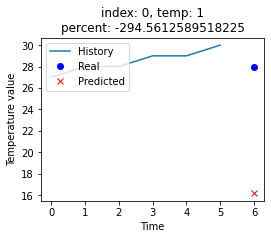

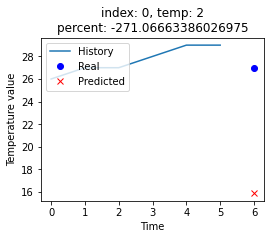

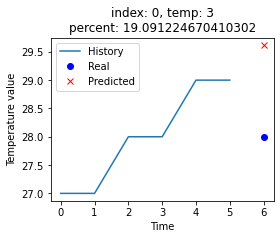

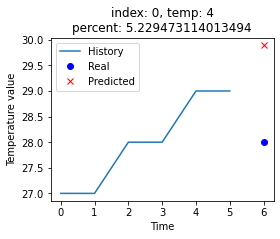

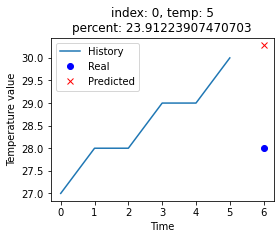

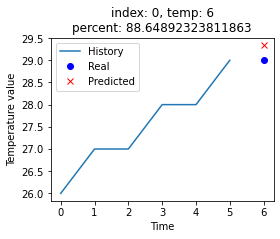

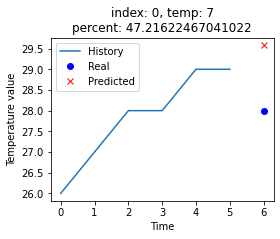

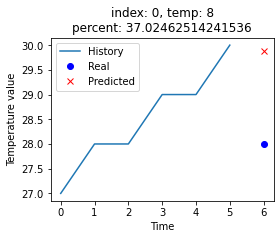

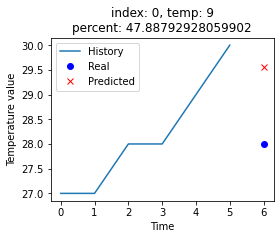

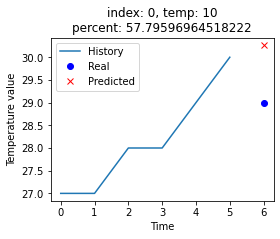

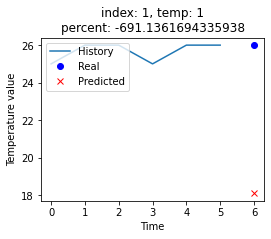

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


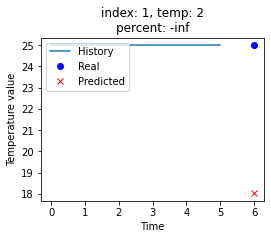

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


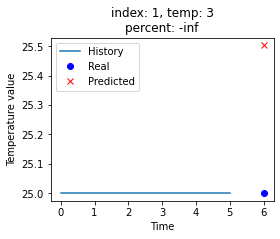

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


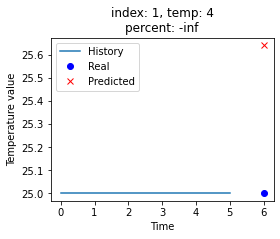

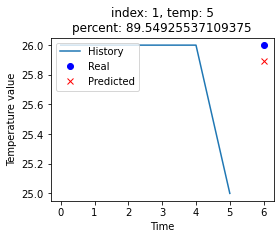

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


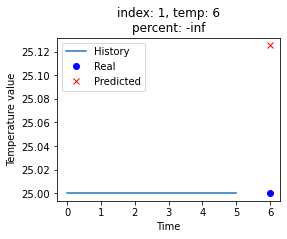

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


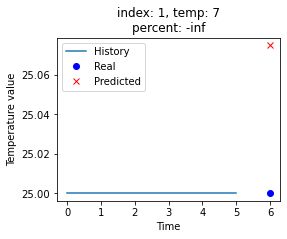

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


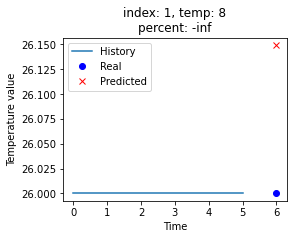

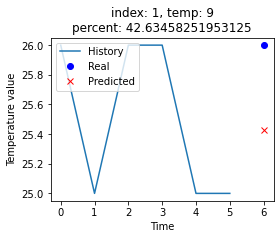

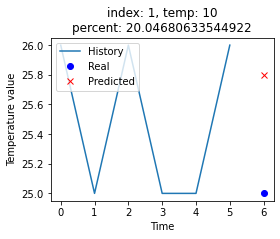

In [35]:
for i in range(2):
    pred_plot(scaler_x.inverse_transform(X_test[:i+1]),
              scaler_y.inverse_transform(y_test[:i+1]),
              scaler_y.inverse_transform(model.predict(X_test[:i+1])),
              i)

# Testing and Experiments

In [36]:
for i in range(5):
    print('test index:', i)
    true = scaler_x.inverse_transform(X_test[i:i+1])[0][(N_TIME - 1) * 10:(N_TIME - 1) * 10 + 10]
    print('True: ', true)

    ynew= model.predict(X_test)
    predict = scaler_y.inverse_transform(ynew[i:i+1])[0]
    print('Predicted: ', predict)

    result = []
    for j in range(len(true)):
        result.append([true[j], " - ", predict[j], " = ", abs(true[j] - predict[j])])
    
    for j in result:
        print(j)
    print("\n")

test index: 0
True:  [30. 29. 29. 29. 30. 29. 29. 30. 30. 30.]
Predicted:  [16.163162 15.868001 29.618176 29.89541  30.282633 29.34053  29.583515
 29.889261 29.563362 30.26612 ]
[30.000000000000004, ' - ', 16.163162, ' = ', 13.836837768554691]
[29.000000000000004, ' - ', 15.868001, ' = ', 13.131999015808109]
[29.000000000000004, ' - ', 29.618176, ' = ', 0.6181755065917933]
[29.0, ' - ', 29.89541, ' = ', 0.8954105377197266]
[30.0, ' - ', 30.282633, ' = ', 0.28263282775878906]
[29.000000000000004, ' - ', 29.34053, ' = ', 0.34053039550780895]
[29.000000000000004, ' - ', 29.583515, ' = ', 0.5835151672363246]
[30.0, ' - ', 29.889261, ' = ', 0.11073875427246094]
[30.000000000000004, ' - ', 29.563362, ' = ', 0.4366378784179723]
[30.000000000000004, ' - ', 30.26612, ' = ', 0.2661209106445277]


test index: 1
True:  [26. 25. 25. 25. 25. 25. 25. 26. 25. 26.]
Predicted:  [18.08864  18.027788 25.503187 25.641087 25.89549  25.125408 25.074862
 26.149218 25.426346 25.799532]
[26.0, ' - ', 18.08864, 

# Visualizations

In [16]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

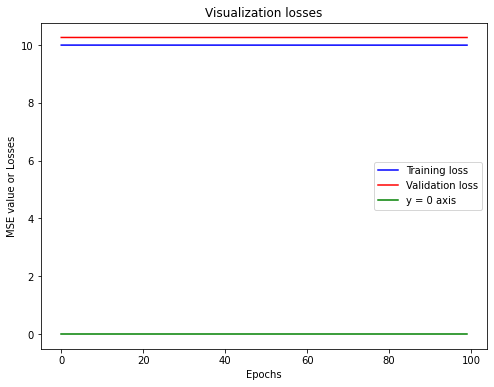

In [17]:
plot_train_history(fit,
                   'Visualization losses')